# CLASSIFICATION

In [58]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import time
import random
import os

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, precision_score

In [9]:
def seed_everything(seed=42):
    """"Seed everything.
    """   
    random.seed(seed)
    np.random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)

In [10]:
seed_everything()

In [101]:
def classification_metric(y_true, y_pred):
    labs = ["high_rain", "low_rain", "no_rain"]
    f1 = np.round(f1_score(y_true, y_pred, labels = labs, average = "macro"), 3)
    class_recall = np.round(recall_score(y_true, y_pred, labels = labs, average = None), 3)
    total_recall = np.round(recall_score(y_true, y_pred, labels = labs, average = "macro"), 3)
    acc = np.round(accuracy_score(y_true, y_pred), 3)
    precision = np.round(precision_score(y_true, y_pred, labels = labs, average = None), 3)

    table = pd.crosstab(y_pred, y_true)
    table["recall"] = class_recall
    table["precision"] = precision
    print("The confusion matrix ")
    print(table)
    print("The prediction accuracy: ", acc)
    print("The f1-score : ", f1)
    print("The recall-score : ", total_recall)


In [11]:
train_set = pd.read_csv("data/train_set.txt",sep = ' ')
test_set = pd.read_csv("data/test_set.txt",sep = ' ')

In [12]:
train_set

,ff,t,td,hu,dd,precip_log,ws_arome,p3031_arome,u10_arome,v10_arome,...,month3,month4,month5,month6,month7,month8,month9,month10,month11,month12
1,-0.086213,1.164777,0.910535,-0.798235,0.520054,-0.820399,-0.036595,0.529785,0.801953,0.400758,...,0,0,0,1,0,0,0,0,0,0
2,-0.215296,-1.471529,-1.661333,-0.454718,0.695888,0.078895,-0.257664,1.323143,0.556898,-0.888709,...,1,0,0,0,0,0,0,0,0,0
4,-1.468680,0.129100,-0.187510,-1.056853,0.129012,-0.820399,-1.317523,-0.827820,-0.605044,-0.693706,...,0,0,1,0,0,0,0,0,0,0
5,1.028401,-1.238485,-1.421240,-0.491033,1.022205,0.269433,0.464623,1.063498,1.186435,-0.717044,...,0,0,0,0,0,0,0,0,0,0
6,-1.465538,-1.273800,-1.288810,0.075769,-0.850480,-0.612447,-1.277939,-0.588190,-0.432199,0.107395,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724,-1.530734,-0.516512,-0.138244,1.196123,-1.643351,-0.820399,-1.372398,-0.675518,-0.807684,-0.353231,...,0,0,0,0,0,0,0,0,1,0
727,-1.169931,1.010201,0.849969,-0.528329,-0.517151,-0.436627,-0.937395,-1.045143,-0.647040,-0.734017,...,0,0,0,0,0,1,0,0,0,0
728,0.070624,1.223185,0.604995,-1.875404,0.563203,-0.820399,-0.361343,0.433055,-0.257686,0.071419,...,0,0,1,0,0,0,0,0,0,0
729,-1.387512,1.472917,1.344347,-0.480237,-1.532241,-0.612447,-1.125196,-1.264025,-1.094799,0.101478,...,0,0,0,1,0,0,0,0,0,0


In [13]:
X_train = pd.DataFrame(train_set).copy()
del X_train['rain']
del X_train['rain_class']
del X_train['rain_log']

X_test = pd.DataFrame(test_set).copy()
del X_test['rain']
del X_test['rain_class']
del X_test['rain_log']

In [14]:
train_set['rain_class'] = train_set['rain_class'].astype("category")
test_set['rain_class'] = test_set['rain_class'].astype("category")

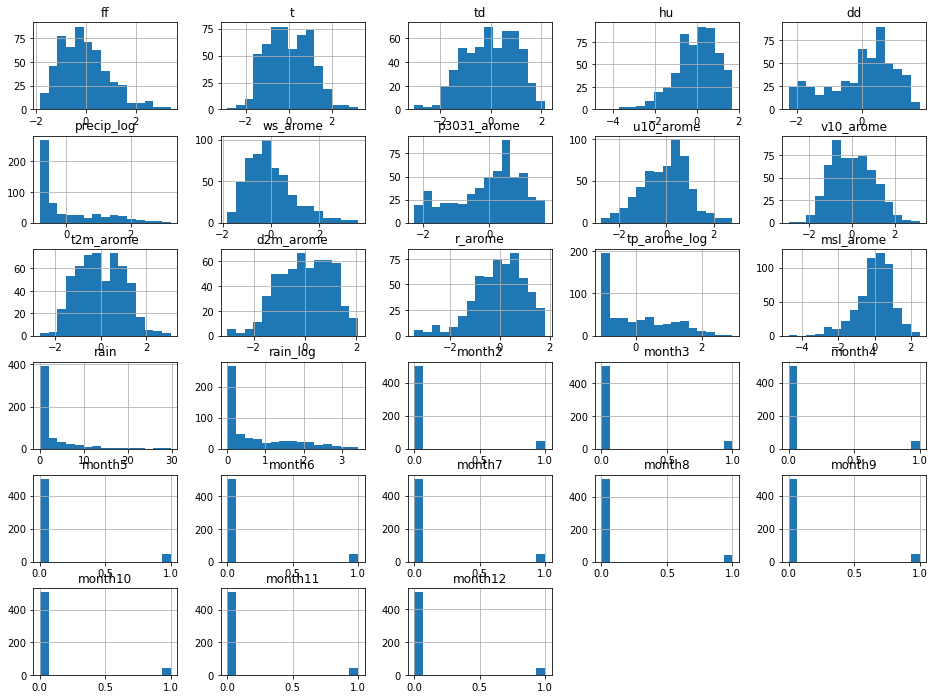

In [15]:
_ = train_set.hist(figsize=(16,12), bins = 15)

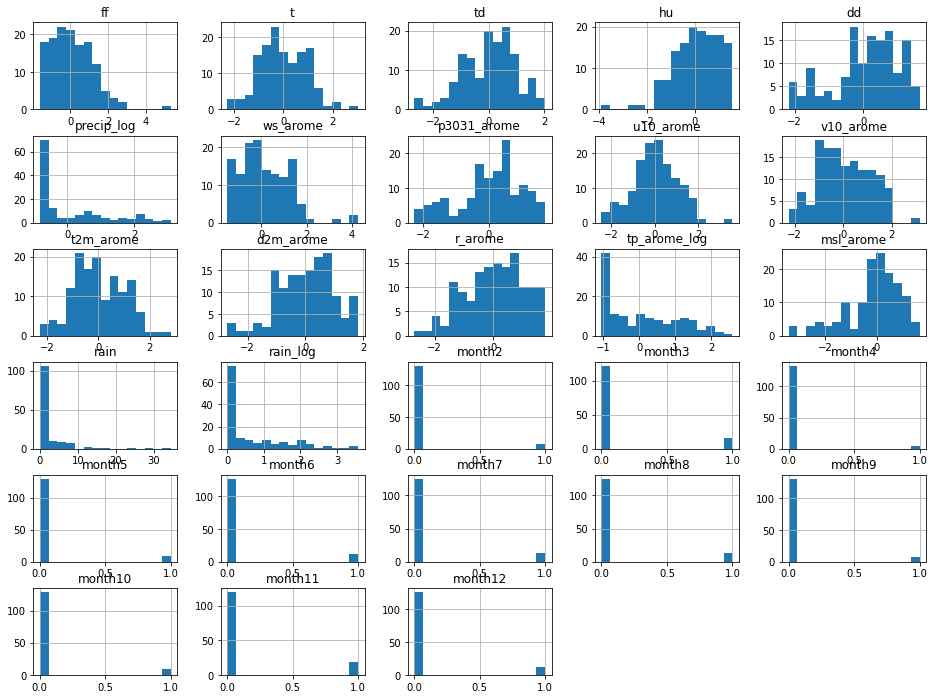

In [16]:
_ = test_set.hist(figsize=(16,12), bins = 15)

In [17]:
Y_train = train_set['rain']
Y_test = test_set['rain']

In [18]:
Y_train_class = train_set['rain_class']
Y_test_class = test_set['rain_class']


In [19]:
X_train.head()

,ff,t,td,hu,dd,precip_log,ws_arome,p3031_arome,u10_arome,v10_arome,...,month3,month4,month5,month6,month7,month8,month9,month10,month11,month12
1,-0.086213,1.164777,0.910535,-0.798235,0.520054,-0.820399,-0.036595,0.529785,0.801953,0.400758,...,0,0,0,1,0,0,0,0,0,0
2,-0.215296,-1.471529,-1.661333,-0.454718,0.695888,0.078895,-0.257664,1.323143,0.556898,-0.888709,...,1,0,0,0,0,0,0,0,0,0
4,-1.468680,0.129100,-0.187510,-1.056853,0.129012,-0.820399,-1.317523,-0.827820,-0.605044,-0.693706,...,0,0,1,0,0,0,0,0,0,0
5,1.028401,-1.238485,-1.421240,-0.491033,1.022205,0.269433,0.464623,1.063498,1.186435,-0.717044,...,0,0,0,0,0,0,0,0,0,0
6,-1.465538,-1.273800,-1.288810,0.075769,-0.850480,-0.612447,-1.277939,-0.588190,-0.432199,0.107395,...,0,0,0,0,0,0,0,0,0,1


## 1. K nearest neighbors

The completeness parameter `k` is optimised on a predefined grid by minimising the estimated error by cross-validation; scikit-learn offers many cross-validation options. 

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
# Optimisation of k
param_grid = [{"n_neighbors": list(range(1, 20))}]
knn = GridSearchCV(KNeighborsClassifier(weights = "distance"), scoring = "accuracy", param_grid = param_grid, cv=10, n_jobs=-1, refit = True)
knnOpt = knn.fit(X_train, Y_train_class)  
# optimal parameter
# knnOpt.best_params_["n_neighbors"]
print("Best Mean cross-validated accuracy = %f, Best parameter = %s" % (knnOpt.best_score_, knnOpt.best_params_))

Best Mean cross-validated accuracy = 0.540000, Best parameter = {'n_neighbors': 18}


The prediction accuracy in the test set

In [21]:
# Estimation of the prediction accuracy on the test sample
print("Prediction accuracy in the test sample : ", knnOpt.score(X_test, Y_test_class))


Prediction accuracy in the test sample :  0.5072463768115942


In [103]:
# Prediction of the test sample
y_hat_class = knnOpt.predict(X_test)
classification_metric(Y_test_class, y_hat_class)
# print("Accuracy score =", accuracy_score(y_true = Y_test_class, y_pred = y_hat_class))

# # confusion matrix
# table = pd.crosstab(y_hat_class, Y_test_class)
# print("Confusion matrix")
# print(table)

The confusion matrix 
rain_class  high_rain  low_rain  no_rain  recall  precision
row_0                                                      
high_rain          20        11       11   0.606      0.476
low_rain           12        37       23   0.638      0.514
no_rain             1        10       13   0.277      0.542
The prediction accuracy:  0.507
The f1-score :  0.49
The recall-score :  0.507


## 2. Decision tree

In [23]:
from sklearn.tree import DecisionTreeClassifier
# Optimisation of shaft depth
param_grid = [{"max_depth": range(2,10), "min_samples_split" : range(2,10), "min_samples_leaf": range(1,5) }]
tree = GridSearchCV(DecisionTreeClassifier(max_features = 'auto', min_impurity_decrease = 1e-3, random_state = 42), scoring = "accuracy", param_grid = param_grid, cv=10, n_jobs=-1, refit = True)
treeOpt = tree.fit(X_train, Y_train_class)
# Optimal parameter
print("Best Mean cross-validated accuracy = %f, Best parameter = %s" % (treeOpt.best_score_, treeOpt.best_params_))

Best Mean cross-validated accuracy = 0.512727, Best parameter = {'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [24]:
# Estimation of the prediction error on the test sample
treeOpt.score(X_test, Y_test_class)

0.4855072463768116

In [75]:
# Prediction of the test sample
y_hat_class = treeOpt.predict(X_test)
classification_metric(Y_test_class, y_hat_class)

The confusion matrix 
rain_class  high_rain  low_rain  no_rain    recall  precision
row_0                                                        
high_rain          14         6        4  0.424242   0.583333
low_rain           17        39       29  0.672414   0.458824
no_rain             2        13       14  0.297872   0.482759
The prediction accuracy:  0.4855072463768116
The f1-score :  0.47219332917273416
The recall-score :  0.4855072463768116


    The `low_rain` class seems to be difficult to predict!

## 3. Random Forest

In [76]:
from sklearn.ensemble import RandomForestClassifier 
# Parameters' definitions
forest = RandomForestClassifier(n_estimators = 500, 
   criterion='gini', max_depth=None,
   min_samples_split=2, min_samples_leaf=1, 
   max_features='auto', max_leaf_nodes=None,
   bootstrap=True, oob_score=True)
# Training
rfFit = forest.fit(X_train,Y_train_class)
# Out-of-bag error on the train sample
print(1 - rfFit.oob_score_)
# Out-of-bag error on the test sample
print(1 - rfFit.score(X_test,Y_test_class))

0.46545454545454545
0.5072463768115942


Hyper parameters tunning by cross validation

In [64]:
param = [{"n_estimators" : range(200, 500, 100) , "max_features": range(2,5), "max_depth" : range(10, 20, 2) }]
rf = GridSearchCV(RandomForestClassifier(random_state=42, criterion="entropy"),
        param, cv = 5, n_jobs=-1)
rfOpt = rf.fit(X_train, Y_train_class)
print("Best Mean cross-validated accuracy = %f, Best parameter = %s" % (rfOpt.best_score_, rfOpt.best_params_))

Best Mean cross-validated accuracy = 0.545455, Best parameter = {'max_depth': 12, 'max_features': 4, 'n_estimators': 300}


In [77]:
# Prediction of the test sample
y_pred_test = treeOpt.predict(X_test)
classification_metric(Y_test_class, y_pred_test)

The confusion matrix 
rain_class  high_rain  low_rain  no_rain    recall  precision
row_0                                                        
high_rain          14         6        4  0.424242   0.583333
low_rain           17        39       29  0.672414   0.458824
no_rain             2        13       14  0.297872   0.482759
The prediction accuracy:  0.4855072463768116
The f1-score :  0.47219332917273416
The recall-score :  0.4855072463768116


### Gradient Boosting applying to Random Forest

In [164]:
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

In [165]:
from xgboost import XGBRFClassifier

In [166]:
# define the model
model = XGBRFClassifier(n_estimators = 500, subsample = 0.99, random_state = 42, metric = "accuracy", n_jobs = -1)

In [167]:
# define the model evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(model, X_train, Y_train_class, scoring='accuracy', cv = cv, n_jobs=-1)
# report performance
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Mean Accuracy: 0.525 (0.052)


In [168]:
y_pred_test = model.predict(X_test)

classification_metric(Y_test_class, y_pred_test)

NotFittedError: need to call fit or load_model beforehand

## 4. Support Vector Machine

### 4.1. Linear SVM 

Optimisation of C - Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty

In [85]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
param=[{"C": np.linspace(0.01, 0.1, 10) }]
svm= GridSearchCV(LinearSVC(), param, cv=10, n_jobs = -1, scoring = "accuracy")
svmLinOpt=svm.fit(X_train, Y_train_class)
print("Best Mean cross-validated accuracy = %f, Best parameter = %s" % (svmLinOpt.best_score_,svmLinOpt.best_params_))

Best Mean cross-validated accuracy = 0.547273, Best parameter = {'C': 0.06000000000000001}


In [107]:
# Prediction of the test sample
y_pred_test = svmLinOpt.predict(X_test)
classification_metric(Y_test_class, y_pred_test)

The confusion matrix 
rain_class  high_rain  low_rain  no_rain  recall  precision
row_0                                                      
high_rain          25        11        9   0.758      0.556
low_rain            7        36       20   0.621      0.571
no_rain             1        11       18   0.383      0.600
The prediction accuracy:  0.572
The f1-score :  0.568
The recall-score :  0.587


    It seems that with the linear kernel, the results is quite good comparing to other methods

### 4.2. SVM with polynomial kernels

By default, we take polynomial of degree 3

In [87]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
param = [{"C":[0.1,0.4,0.5,0.6,0.8,1,1.2,1.4,1.6,2],"gamma":np.array(range(1,11))/100, "coef0":np.array(range(1,11))/10}]
svm = GridSearchCV(SVC(kernel="poly"),param,cv=10,n_jobs=-1, scoring = "accuracy")
svmPolyOpt=svm.fit(X_train, Y_train_class)
print("Best Mean cross-validated accuracy = %f, Best parameter = %s" % (svmPolyOpt.best_score_, svmPolyOpt.best_params_))

Best Mean cross-validated accuracy = 0.543636, Best parameter = {'C': 1, 'coef0': 0.9, 'gamma': 0.04}


In [106]:
# Prediction of the test sample
y_pred_test = svmPolyOpt.predict(X_test)
classification_metric(Y_test_class, y_pred_test)

The confusion matrix 
rain_class  high_rain  low_rain  no_rain  recall  precision
row_0                                                      
high_rain          20        10        7   0.606      0.541
low_rain           13        38       26   0.655      0.494
no_rain             0        10       14   0.298      0.583
The prediction accuracy:  0.522
The f1-score :  0.51
The recall-score :  0.52


Let's test for degree 2

In [90]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
param=[{"C":[0.1,0.4,0.5,0.6,0.8,1,1.2,1.4,1.6,2],"gamma":np.array(range(1,11))/100, "coef0":np.array(range(1,11))/10}]
svm= GridSearchCV(SVC(kernel="poly",degree =2),param,cv=10,n_jobs=-1,scoring = "accuracy")
svmPoly2Opt=svm.fit(X_train, Y_train_class)
print("Best Mean cross-validated accuracy = %f, Best parameter = %s" % (svmPoly2Opt.best_score_,svmPoly2Opt.best_params_))

Best Mean cross-validated accuracy = 0.545455, Best parameter = {'C': 1, 'coef0': 0.9, 'gamma': 0.08}


In [105]:
# Prediction of the test sample
y_pred_test= svmPoly2Opt.predict(X_test)
classification_metric(Y_test_class, y_pred_test)

The confusion matrix 
rain_class  high_rain  low_rain  no_rain  recall  precision
row_0                                                      
high_rain          20        12        8   0.606      0.500
low_rain           12        34       23   0.586      0.493
no_rain             1        12       16   0.340      0.552
The prediction accuracy:  0.507
The f1-score :  0.501
The recall-score :  0.511


### 4.3. SVM with radial kernel

In [93]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
param=[{"C":[0.1,0.4,0.5,0.6,0.8,1,1.2,1.4,1.6,2],"gamma":np.array(range(1,11))/100, "coef0":np.array(range(1,11))/10}]
svm= GridSearchCV(SVC(kernel="rbf"),param,cv=10,n_jobs=-1,scoring = "accuracy")
svmRadOpt=svm.fit(X_train, Y_train_class)
print("Best Mean cross-validated accuracy = %f, Best parameter = %s" % (svmRadOpt.best_score_,svmRadOpt.best_params_))

Best Mean cross-validated accuracy = 0.567273, Best parameter = {'C': 1.2, 'coef0': 0.1, 'gamma': 0.1}


In [104]:
# Prediction of the test sample
y_pred_test = svmRadOpt.predict(X_test)
classification_metric(Y_test_class, y_pred_test)

The confusion matrix 
rain_class  high_rain  low_rain  no_rain  recall  precision
row_0                                                      
high_rain          21         9       10   0.636      0.525
low_rain           11        40       26   0.690      0.519
no_rain             1         9       11   0.234      0.524
The prediction accuracy:  0.522
The f1-score :  0.497
The recall-score :  0.52


### 4.3. SVM with sigmoid kernel

In [99]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
param=[{"C":[0.1,0.4,0.5,0.6,0.8,1,1.2,1.4,1.6,2],"gamma":np.array(range(1,11))/100, "coef0":np.array(range(1,11))/10}]
svm= GridSearchCV(SVC(kernel="sigmoid"),param,cv=10,n_jobs=-1,scoring = "accuracy")
svmSigOpt=svm.fit(X_train, Y_train_class)
print("Best Mean cross-validated accuracy = %f, Best parameter = %s" % (svmSigOpt.best_score_,svmSigOpt.best_params_))

Best Mean cross-validated accuracy = 0.516364, Best parameter = {'C': 0.4, 'coef0': 0.1, 'gamma': 0.05}


In [100]:
# Prediction of the test sample
y_pred_test = svmSigOpt.predict(X_test)
classification_metric(Y_test_class, y_pred_test)

The confusion matrix 
rain_class  high_rain  low_rain  no_rain  recall  precision
row_0                                                      
high_rain          26        12        8   0.788      0.565
low_rain            7        42       35   0.724      0.500
no_rain             0         4        4   0.085      0.500
The prediction accuracy:  0.522
The f1-score :  0.456
The recall-score :  0.522


# Neural Network

## Multi-layer Perceptron Classifier

In [108]:
from sklearn.neural_network import MLPClassifier

#### One hidden layer neural network

Firstly, we fit an one-hidden layer neural network with ReLU activation in the hidden layer and the softmax activation for the out put layer, and the log-loss function. We use here the default configuration for the optimisation task.

In [109]:
nnet1 = MLPClassifier(hidden_layer_sizes = (3), random_state = 42, max_iter = 1500)
nnet1.fit(X_train, Y_train_class)

MLPClassifier(hidden_layer_sizes=3, max_iter=1500, random_state=42)

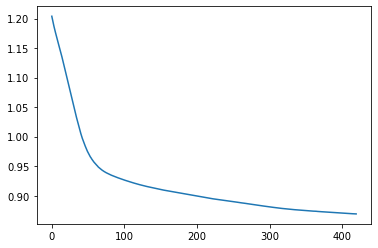

In [111]:
plt.plot(nnet1.loss_curve_)

Training accuracy

In [113]:
y_pred = nnet1.predict(X_train)

classification_metric(Y_train_class, y_pred)

The confusion matrix 
rain_class  high_rain  low_rain  no_rain  recall  precision
row_0                                                      
high_rain          90        34        9   0.581      0.677
low_rain           60       179      100   0.765      0.528
no_rain             5        21       52   0.323      0.667
The prediction accuracy:  0.584
The f1-score :  0.562
The recall-score :  0.556


Test accuracy

In [117]:
y_pred_test = nnet1.predict(X_test)

classification_metric(Y_test_class, y_pred_test)

The confusion matrix 
rain_class  high_rain  low_rain  no_rain  recall  precision
row_0                                                      
high_rain          24        10        8   0.727      0.571
low_rain            8        36       28   0.621      0.500
no_rain             1        12       11   0.234      0.458
The prediction accuracy:  0.514
The f1-score :  0.501
The recall-score :  0.527


    Since the training accuracy is low, we can not expect that the test accuracy is good. It means that this model does fit with the data or the optimisation process did not minimize the loss function since it stopped around 500 iterations

We'll use cross validation for searching the optimal number of neurones in the hidden layer and the learning rate for optimisation process

In [114]:
param_grid = [{"hidden_layer_sizes" : [(3,),(4,),(5,),(6,), (7,)], "early_stopping" : [True, False], "alpha" : [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1]}]

nnet1_cv = GridSearchCV(MLPClassifier(max_iter = 1500, random_state = 42), param_grid, cv = 5, n_jobs=-1, return_train_score = True)
nnet1_cv.fit(X_train, Y_train_class)

print("Best Mean cross-validated accuracy = %f, Best parameter = %s" % (nnet1_cv.best_score_, nnet1_cv.best_params_))

Best Mean cross-validated accuracy = 0.527273, Best parameter = {'alpha': 0.01, 'early_stopping': False, 'hidden_layer_sizes': (5,)}


In [115]:
y_pred = nnet1_cv.predict(X_train)

classification_metric(Y_train_class, y_pred)

The confusion matrix 
rain_class  high_rain  low_rain  no_rain  recall  precision
row_0                                                      
high_rain         106        31       10   0.684      0.721
low_rain           36       172       73   0.735      0.612
no_rain            13        31       78   0.484      0.639
The prediction accuracy:  0.647
The f1-score :  0.64
The recall-score :  0.634


In [118]:
y_pred_test = nnet1_cv.predict(X_test)

classification_metric(Y_test_class, y_pred_test)

The confusion matrix 
rain_class  high_rain  low_rain  no_rain  recall  precision
row_0                                                      
high_rain          25        12        8   0.758      0.556
low_rain            7        33       24   0.569      0.516
no_rain             1        13       15   0.319      0.517
The prediction accuracy:  0.529
The f1-score :  0.526
The recall-score :  0.549


We can see that the loss function is almost reached the minimum but the prediction accuracy is still arounded $50$ percents. It means that this model does not fit well the data. We will try with more sophisticated models in the next sections

### Multilayers Neural Network

    Remark that if we just fit a sophisticated model with many parameters (weights and biases), we can get very high performance on the training set. But unfortunately, we can get a worse performance on the test set
    and the generalization of the model is very bad. This is the **overfitting** phenomenon

In [132]:
nnet_of = MLPClassifier(hidden_layer_sizes = (20, 25 , 15, 15, 10, 5), random_state = 42, max_iter = 1500, alpha = 0.1, activation = "relu", early_stopping = False, n_iter_no_change = 75)
nnet_of.fit(X_train, Y_train_class)


MLPClassifier(alpha=0.1, hidden_layer_sizes=(20, 25, 15, 15, 10, 5),
              max_iter=1500, n_iter_no_change=75, random_state=42)

Training accuracy :  1.0


Text(0.5, 0, 'Iteration')

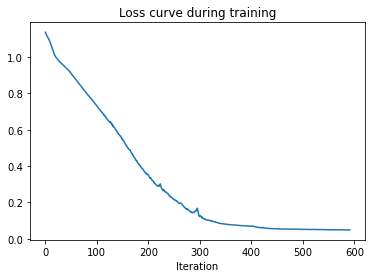

In [133]:
print("Training accuracy : ", nnet_of.score(X_train, Y_train_class))
plt.plot(nnet_of.loss_curve_)
plt.title("Loss curve during training")
plt.xlabel("Iteration")

In [134]:
y_pred_test = nnet_of.predict(X_test)

classification_metric(Y_test_class, y_pred_test)

The confusion matrix 
rain_class  high_rain  low_rain  no_rain  recall  precision
row_0                                                      
high_rain          23        16       10   0.697      0.469
low_rain            7        25       22   0.431      0.463
no_rain             3        17       15   0.319      0.429
The prediction accuracy:  0.457
The f1-score :  0.458
The recall-score :  0.482


We try here to find a Neural Network which can generalize the data 

Training accuracy :  0.5454545454545454


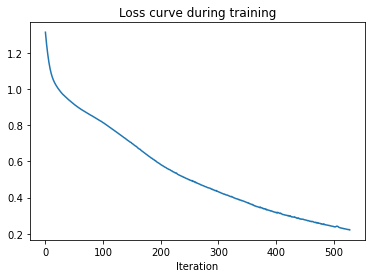

The confusion matrix 
rain_class  high_rain  low_rain  no_rain  recall  precision
row_0                                                      
high_rain          25        11        9   0.758      0.556
low_rain            7        42       27   0.724      0.553
no_rain             1         5       11   0.234      0.647
The prediction accuracy:  0.565
The f1-score :  0.537
The recall-score :  0.572


In [160]:
nnet = MLPClassifier(hidden_layer_sizes = (15, 10, 10, 8, 8, 5), random_state = 42, max_iter = 1500, alpha = 0.1, activation = "tanh", early_stopping = True, n_iter_no_change = 500)
nnet.fit(X_train, Y_train_class)

print("Training accuracy : ", nnet.score(X_train, Y_train_class))
plt.plot(nnet.loss_curve_)
plt.title("Loss curve during training")
plt.xlabel("Iteration")
plt.show()
y_pred_test = nnet.predict(X_test)

classification_metric(Y_test_class, y_pred_test)

15, 15, 10, 5: 0.529

15, 15, 8, 8, 5, tanh : 0.536

15, 10, 10, 8, 8, 5, tanh: 0.565

# Gaussian Process Classification

In [161]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import Matern


In [162]:
GPC = GaussianProcessClassifier(kernel = 0.5*RBF(3.0), random_state = 42, multi_class = "one_vs_rest")
GPC.fit(X_train, Y_train_class)
print(GPC.score(X_train, Y_train_class))
print(GPC.score(X_test, Y_test_class))

0.5981818181818181
0.5144927536231884


In [163]:
GPC = GaussianProcessClassifier(kernel = Matern(3.0, nu = 1.5), random_state = 42, multi_class = "one_vs_rest")
GPC.fit(X_train, Y_train_class)
print(GPC.score(X_train, Y_train_class))
print(GPC.score(X_test, Y_test_class))

0.6218181818181818
0.5217391304347826
